In [15]:
import numpy as np
from random import *
from numpy import linalg as LA
from matplotlib import pyplot as plt

# HW1-Finite Difference Method under Matrix Computation

## Part1: The first derivative and its accuracy

In this part, we construct matrices to compute the first derivatives using three different schemes, the forward/backward difference, and the central difference method. The numerical accuracy under increasing resolution will be studied for both uniform and non-uniform grids, and the comparison of these three methods will be investigated as well.

In each method, a 1-D domain of $n+1$ monotonically increasing grid points: $ -1 = x[0] < x[1] < \dotsb < x[n] = 1  $ will be used, and the derivative $u^{'}(x)$ will be computed on these grid points.

#### Note: 
For each scheme, in order to compute the derivatives on all the end points without the boundary conditions, we will introduce the ghost points $x[-1]$ and $x[n+1]$. In computation, this end-point treatment is done by adding additional rows to form a square matrix. 

The algebraic and the matrix expression as:
### Forward(left) Difference Method
$$ u_{[i]}^{'}=\frac{u_{[i+1]}-u_{[i]}}{x_{[i+1]}-x_{[i]}},\quad i = 0,1,\dots,n ,\\$$
If the girds are uniformly distributed: $$ \frac{1}{h}\begin{bmatrix} -1 & 1 & 0 & 0 & \dots & 0 \\ 0 & -1 & 1 & 0 & \dots & 0 \\ 0 & 0 & -1 & 1 & \dots & 0 \\ \vdots \\ 0 & 0 & 0 & \dots & -1 & 1\\ 0 & 0 & 0 & \dots & 0 & \frac{u_{[n+1]}-u_{[n]}}{u_{[n]}} \end{bmatrix} \cdot \begin{bmatrix} u_{[0]} \\ u_{[1]} \\ u_{[2]} \\ \vdots \\ u_{[n-1]}\\ u_{[n]} \end{bmatrix} =  \begin{bmatrix} u^{'}_{[0]} \\ u^{'}_{[1]} \\ u^{'}_{[2]} \\ \vdots \\ u^{'}_{[n-1]} \\ u^{'}_{[n]}\end{bmatrix}$$

The code as:

In [16]:
def diffmat_l(x,u):
    xx = x[2:-2]
    D1 = np.zeros((len(xx),len(xx)))
    for i in range(0,len(xx)-1):
        h          = xx[i+1]-xx[i]
        D1[i][i]   = -1/h
        D1[i][i+1] =  1/h
    D1[len(xx)-1][-1]   = ((u[-2]-u[-3])/u[-3])/(x[-2]-x[-3])
    return D1

### Backward(right) Difference Method
$$ u_{[i]}^{'}=\frac{u_{[i]}-u_{[i-1]}}{x_{[i]}-x_{[i-1]}},\quad i = 0,1,\dots,n ,\\$$
If the girds are uniformly distributed: $$ \frac{1}{h}\begin{bmatrix}  \frac{u_{[0]}-u_{[-1]}}{u_{[0]}} & 0 & 0 & 0 & \dots & 0 \\ -1 & 1 & 0 & 0 & \dots & 0 \\ 0 & -1 & 1 & 0 & \dots & 0 \\ 0 & 0 & -1 & 1 & \dots & 0 \\ \vdots \\ 0 & 0 & 0 & \dots & -1 & 1 \end{bmatrix} \cdot \begin{bmatrix} u_{[0]} \\ u_{[1]} \\ u_{[2]} \\ \vdots \\ u_{[n-1]}\\ u_{[n]} \end{bmatrix} =  \begin{bmatrix} u^{'}_{[0]} \\ u^{'}_{[1]} \\ u^{'}_{[2]} \\ \vdots \\ u^{'}_{[n-1]} \\ u^{'}_{[n]}\end{bmatrix}$$
The code as:

In [17]:
def diffmat_r(x,u):
    xx = x[2:-2]
    D1 = np.zeros((len(xx),len(xx)))
    for i in range(1,len(xx)):
        h          = xx[i]-xx[i-1]
        D1[i][i-1]   =  -1/h
        D1[i][i]     =   1/h
    D1[0][0]   = ((u[2]-u[1])/u[2])/(x[2]-x[1])
    return D1

### Central Difference Method
$$u_{[i]}^{'}=\frac{u_{[i+1]}-u_{[i-1]}}{x_{[i+1]}-x_{[i-1]}},\quad i = 0,1,\dots,n ,$$
If the girds are uniformly distributed: $$ \frac{1}{2h} \begin{bmatrix} \frac{u_{[1]}-u_{[-1]}}{u_{[0]}} & 0 & 0 & 0 & \dots & 0 \\ -1 & 0 & 1 & 0 & \dots & 0 \\ 0 & -1 & 0 & 1 & \dots & 0 \\ \vdots \\ 0 & 0 & \dots & -1 & 0 & 1\\ 0 & 0 & 0 & 0 & \dots & \frac{u_{[n+1]}-u_{[n-1]}}{u_{[n]}} \end{bmatrix} \cdot \begin{bmatrix} u_{[0]} \\ u_{[1]} \\ u_{[2]} \\ \vdots \\ u_{[n-1]} \\ u_{[n]}\end{bmatrix} =  \begin{bmatrix} u^{'}_{[0]} \\ u^{'}_{[1]} \\ u^{'}_{[2]} \\ u^{'}_{[3]} \\ \vdots \\ u^{'}_{[n]} \end{bmatrix}$$

The code as:

In [18]:
def diffmat_c(x,u):
    xx = x[2:-2]
    D1 = np.zeros((len(xx),len(xx)))
    for i in range(1,len(xx)-1):
        h          = xx[i+1]-xx[i-1]
        D1[i][i-1]   =  -1/h
        D1[i][i+1]   =  1/h
    D1[0][0]            = ((u[3]-u[1])/u[2])/(x[3]-x[1])
    D1[len(xx)-1][-1]   = ((u[-2]-u[-4])/u[-3])/(x[-2]-x[-4])
    return D1

### Function test on uniformly grids



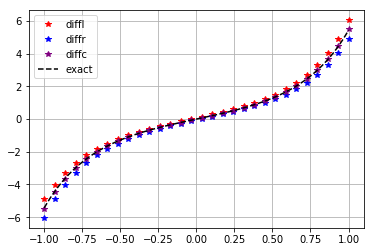

In [19]:
x_s,x_e = -1,1
n,L = 30,x_e-x_s                        # Domain information
x       = np.linspace(x_s-2*L/(n-1),x_e+2*L/(n-1),n+4)     #the grid points vector
x_fine  = np.linspace(-1,1,100)         #the fine grid points vector for exact solution
u_test  = np.exp(x**2)                  #the test function vector
D_1_l   = diffmat_l(x,u_test)           #the first derivative matrix computed left
D_1_r   = diffmat_r(x,u_test)           #the first derivative matrix computed right
D_1c    = diffmat_c(x,u_test)           #the first derivative matrix computed by central difference method 
df_c    = np.dot(D_1c,u_test[2:-2])     #compute the first derivative vector computed by central difference
df_l    = np.dot(D_1_l,u_test[2:-2])    #compute the first derivative vector by left difference
df_r    = np.dot(D_1_r,u_test[2:-2])    #compute the first derivative vector by right difference
df_real = 2*x_fine*np.exp(x_fine**2)    #the exact value vector

plt.figure()
plt.plot(x[2:-2], df_l, '*', label= 'diffl',color='red')
plt.plot(x[2:-2], df_r, '*', label= 'diffr',color ='blue')
plt.plot(x[2:-2], df_c, '*', label= 'diffc',color='purple')
plt.plot(x_fine, df_real, '--',label='exact',color = 'black')
plt.legend(loc='upper left')
plt.grid()


From the figure above, we can see all the three methods behave well on the whole grid points of test function $u(x) = e^{x^2}$, and for this test function, the central difference method tends to be preferable than the other two.

### Accuracy test for uniformly and non-uniformly grids
#### Accuracy on uniform grids


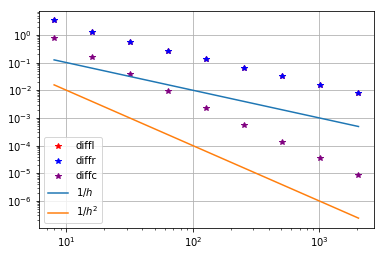

In [20]:
grids = 2**np.arange(3,12)            #define grids level 
error_l = []
error_r = []
error_c = []                          #initialize error vector
for ii in grids:
    y =  np.linspace(x_s-2*L/(ii-1),x_e+2*L/(ii-1),ii+4)    #create current grid points
    test  = np.exp(y**2)                                    #compute test function vector 
    df_real = 2*y*np.exp(y**2)                              #the exact frist derivative vector
    df_c    = np.dot(diffmat_c(y,test),test[2:-2])     
    df_l    = np.dot(diffmat_l(y,test),test[2:-2])     
    df_r    = np.dot(diffmat_r(y,test),test[2:-2])          
    error_l.append(LA.norm(df_real[2:-2]-df_l,np.inf))     
    error_r.append(LA.norm(df_real[2:-2]-df_r,np.inf))
    error_c.append(LA.norm(df_real[2:-2]-df_c,np.inf))     #compute the error using infinte norm

plt.figure()
plt.loglog(grids, error_l, '*', label= 'diffl',color='red')
plt.loglog(grids, error_r, '*', label= 'diffr',color ='blue')
plt.loglog(grids, error_c, '*', label= 'diffc',color='purple')
plt.loglog(grids, grids**(-1.), label='$1/h$')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.legend(loc='lower left')
plt.grid()
plt.show()


From the figure above, for evenly distributed grids, and by utilizing infinite norm to calculate error, we can approximately see the one-side difference method has a first-order accuracy and the central-difference method has the accuracy of order 2

#### Accuracy on randomly non-uniform grids

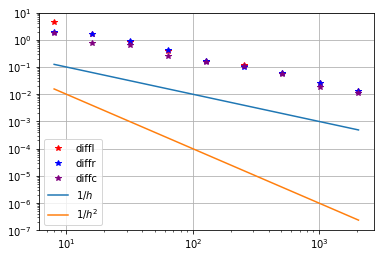

In [21]:
error_nl = []
error_nr = []
error_nc = []
for ii in grids:
    y   =  np.linspace(x_s-2*L/(ii-1),x_e+2*L/(ii-1),ii+4)
    y_n =  np.asarray(list(map(lambda x: x+random()*L/(ii-1),y)))         # generate random grid points
    test  = np.exp(y_n**2)
    df_real = 2*y_n*np.exp(y_n**2)    
    df_c    = np.dot(diffmat_c(y_n,test),test[2:-2])     
    df_l    = np.dot(diffmat_l(y_n,test),test[2:-2])     
    df_r    = np.dot(diffmat_r(y_n,test),test[2:-2])    
    error_nl.append(LA.norm(df_real[2:-2]-df_l,np.inf))
    error_nr.append(LA.norm(df_real[2:-2]-df_r,np.inf))
    error_nc.append(LA.norm(df_real[2:-2]-df_c,np.inf))

plt.figure()
plt.loglog(grids, error_nl, '*', label= 'diffl',color='red')
plt.loglog(grids, error_nr, '*', label= 'diffr',color ='blue')
plt.loglog(grids, error_nc, '*', label= 'diffc',color='purple')
plt.loglog(grids, grids**(-1.), label='$1/h$')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In this section, we create unevenly distributed grid points by adding a random number ranging from 0 to the original grid spacing to each of the orignial grid points. By many random experiments, the error-resolution relationship is similiar to the figure above, which we can roughly conclude for all the methods, a numerical accuracy of order 1 is achieved. Comparing to the uniformly-grid case, only the central difference method changes the order of accuracy, and this possibly means a valid central difference scheme requires an evenly distributed grids. 

#### Accuracy on designed non-uniform grids

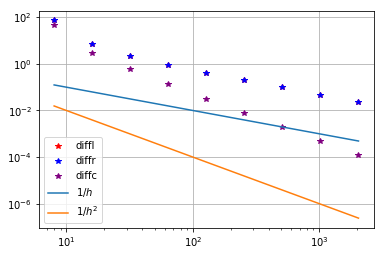

In [22]:
error_dnl = []
error_dnr = []
error_dnc = []
for ii in grids:
    y   =   np.linspace(x_s-2*L/(ii-1),x_e+2*L/(ii-1),ii+4)                      
    y_dn =  np.asarray(list(map(lambda x: x**3,y)))              # generate cubic grid points
    test  = np.exp(y_dn**2)
    df_real = 2*y_dn*np.exp(y_dn**2)    
    df_c    = np.dot(diffmat_c(y_dn,test),test[2:-2])     
    df_l    = np.dot(diffmat_l(y_dn,test),test[2:-2])     
    df_r    = np.dot(diffmat_r(y_dn,test),test[2:-2])    
    error_dnl.append(LA.norm(df_real[2:-2]-df_l,np.inf))
    error_dnr.append(LA.norm(df_real[2:-2]-df_r,np.inf))
    error_dnc.append(LA.norm(df_real[2:-2]-df_c,np.inf))

plt.figure()
plt.loglog(grids, error_dnl, '*', label= 'diffl',color='red')
plt.loglog(grids, error_dnr, '*', label= 'diffr',color ='blue')
plt.loglog(grids, error_dnc, '*', label= 'diffc',color='purple')
plt.loglog(grids, grids**(-1.), label='$1/h$')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.legend(loc='lower left')
plt.grid()
plt.show()

In this section, we use cubic grid points, which has a denser grid distribution near $x=0$. By the test, we can see the central difference method regains its second order accuracy by using the infinite norm to compute error. But for the one-side method, it seems it follows the second order accuracy at the first place, but with the resolution increasing, it goes back to the first order accuracy.

## The second derivative and its accuracy

In this part, we construct matrices to compute the second derivatives using two different schemes, the double central difference, and the "stagger point" method. The numerical accuracy under increasing resolution will be studied for both uniform and non-uniform grids, and the comparison of these two methods will be investigated as well.

#### Note: 
For each scheme, in order to compute the derivatives on all the end points as no boundary condition is enforced, we will introduce the ghost points $x[-1]$, $x[-2]$, $x[n+1]$ and $x[n+2]$. In computation, this treatment is done by adding additional rows to form a square matrix. 


The algebraic and the matrix expression:
### The Double Central Difference Method
$$ u_{[i]}^{'}=\frac{(x_{[i]}-x_{[i-2]})u_{[i+2]}-(x_{[i+2]}-x_{[i-2]})u_{[i]}+(x_{[i+2]}-x_{[i]})u_{[i-2]}}{(x_{[i+2]}-x_{[i]})(x_{[i]}-x_{[i-2]})(x_{[i+1]}-x_{[i-1]})},\quad i = 0,1,\dots,n ,\\$$
If the girds are uniformly distributed: $$ \frac{1}{4h^2} \begin{bmatrix} \frac{u_{[2]}-2u_{[0]}+u_{[-2]}}{u_{[0]}} & 0 & 0 & 0 & 0 & 0 & \dots & 0 \\ 0 & \frac{u_{[3]}-2u_{[1]}+u_{[-1]}}{u_{[1]}} & 0 & 0 & 0 & 0 & \dots & 0 \\ 1 & 0 & -2 & 0 & 1 & 0 & \dots & 0 \\ 0 & 1 & 0 & -2 & 0 & 1 & \dots & 0 \\ \vdots \\ 0 & 0 & \dots & 1 & 0 & -2 & 0 & 1\\ 0 & 0 & 0 & 0 & 0 & \dots & \frac{u_{[n+1]}-2u_{[n-1]}+u_{[n-3]}}{u_{[n-1]}}  & 0\\ 0 & 0 & 0 & 0 & 0 & 0 & \dots & \frac{u_{[n+2]}-2u_{[n]}+u_{[n-2]}}{u_{[n]}}   \end{bmatrix} \cdot \begin{bmatrix} u_{[0]} \\ u_{[1]} \\ u_{[2]} \\ \vdots \\ u_{[n-1]} \\ u_{[n]} \end{bmatrix} =  \begin{bmatrix} u^{'}_{[0]} \\u^{'}_{[1]} \\ u^{'}_{[2]} \\  \\ \vdots \\ u^{'}_{[n-1]} \\ u^{'}_{[n]} \end{bmatrix}$$

The code as:




In [23]:
def diffmat2_cc(x,u):
    xx = x[2:-2]
    D1 = np.zeros((len(xx),len(xx)))
    for i in range(2,len(xx)-2):
        h            = (xx[i+2]-xx[i])*(xx[i]-xx[i-2])*(xx[i+1]-xx[i-1])
        D1[i][i-2]   =  (xx[i+2]-xx[i])/h
        D1[i][i]   =  -(xx[i+2]-xx[i-2])/h
        D1[i][i+2]   =  (xx[i]-xx[i-2])/h
    D1[0][0]            = (((x[2]-x[0])*u[4]-(x[4]-x[0])*u[2]+(x[4]-x[2])*u[0])/u[2])/(x[4]-x[2])/(x[2]-x[0])/(x[3]-x[1])
    D1[1][1]            = (((x[3]-x[1])*u[5]-(x[5]-x[1])*u[3]+(x[5]-x[3])*u[1])/u[3])/(x[5]-x[3])/(x[3]-x[1])/(x[4]-x[2])
    D1[len(xx)-2][-2]   = (((x[-4]-x[-6])*u[-2]-(x[-2]-x[-6])*u[-4]+(x[-2]-x[-4])*u[-6])/u[-4])/(x[-2]-x[-4])/(x[-4]-x[-6])/(x[-3]-x[-5])
    D1[len(xx)-1][-1]   = (((x[-3]-x[-5])*u[-1]-(x[-1]-x[-5])*u[-3]+(x[-1]-x[-3])*u[-5])/u[-3])/(x[-1]-x[-3])/(x[-3]-x[-5])/(x[-2]-x[-4])
    return D1     


### The "Stagger Point" Method
$$ u_{[i]}^{'}=\frac{2(x_{[i]}-x_{[i-1]})u_{[i+1]}-2(x_{[i+1]}-x_{[i-1]})u_{[i]}+2(x_{[i+1]}-x_{[i]})u_{[i-1]}}{(x_{[i+1]}-x_{[i-1]})(x_{[i+1]}-x_{[i]})(x_{[i]}-x_{[i-1]})},\quad i = 0,1,\dots,n ,\\$$
If the girds are uniformly distributed: $$ \frac{1}{h^2} \begin{bmatrix} \frac{u_{[1]}-2u_{[0]}+u_{[-1]}}{u_{[0]}} & 0 & 0 & 0 & 0 & 0 & \dots & 0 \\ 1 & -2 & 1 & 0 & 0 & 0 & \dots & 0 \\ 0 & 1 & -2 & 1 & 0 & 0 & \dots & 0 \\ \vdots \\ 0 & 0 & 0 & 0 & \dots & 1 & -2 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & \dots & \frac{u_{[n+1]}-2u_{[n]}+u_{[n-1]}}{u_{[n]}}   \end{bmatrix} \cdot \begin{bmatrix} u_{[0]} \\ u_{[1]} \\ u_{[2]} \\ \vdots \\ u_{[n-1]} \\ u_{[n]} \end{bmatrix} =  \begin{bmatrix} u^{'}_{[0]} \\u^{'}_{[1]} \\ u^{'}_{[2]} \\  \\ \vdots \\ u^{'}_{[n-1]} \\ u^{'}_{[n]} \end{bmatrix}$$

The code as:

In [24]:
def diffmat2_st(x,u):
    xx = x[2:-2]
    D1 = np.zeros((len(xx),len(xx)))
    for i in range(1,len(xx)-1):
        h          = (xx[i+1]-xx[i-1])*(xx[i+1]-xx[i])*(xx[i]-xx[i-1])
        D1[i][i-1]   =  2*(xx[i+1]-xx[i])/h
        D1[i][i]   =  -2*(xx[i+1]-xx[i-1])/h
        D1[i][i+1]   =  2*(xx[i]-xx[i-1])/h
    D1[0][0]            = (((x[2]-x[1])*u[3]-(x[3]-x[1])*u[2]+(x[3]-x[2])*u[1])/u[2])/(x[3]-x[1])/(x[3]-x[2])*2/(x[2]-x[1])
    D1[len(xx)-1][-1]   = (((x[-3]-x[-4])*u[-2]-(x[-2]-x[-4])*u[-3]+(x[-2]-x[-3])*u[-4])/u[-3])/(x[-2]-x[-4])*2/(x[-2]-x[-3])/(x[-3]-x[-4])
    return D1     

### Function test on uniformly grids



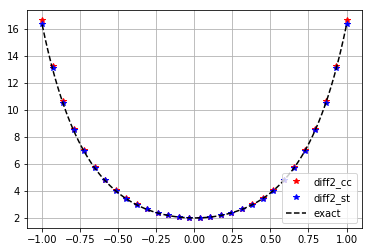

In [25]:
D_2cc    = diffmat2_cc(x,u_test)           #the second derivative matrix computed using twice central difference
D_2st    = diffmat2_st(x,u_test)           #the second derivative matrix computed using stagger points
df2_cc    = np.dot(D_2cc,u_test[2:-2])       #compute the second derivative vector computed by double central difference
df2_st    = np.dot(D_2st,u_test[2:-2])         #compute the second derivative vector computed using stagger points
df2_real = (2+4*x_fine**2)*np.exp(x_fine**2)    #the exact value vector

plt.figure()
plt.plot(x[2:-2], df2_cc, '*', label= 'diff2_cc',color='red')
plt.plot(x[2:-2], df2_st, '*', label= 'diff2_st',color='blue')
plt.plot(x_fine, df2_real, '--',label='exact',color = 'black')
plt.legend(loc='lower right')
plt.grid()

By the figure above, we see both the two differentiating schemes work well on the whole grids of the test function $u(x) = e^{x^2}$, and it seems that by using the "stagger point" scheme, a relatively better endpoint-approximation will be achieved.

### Accuracy test for uniformly and non-uniformly grids
#### Accuracy on uniform grids

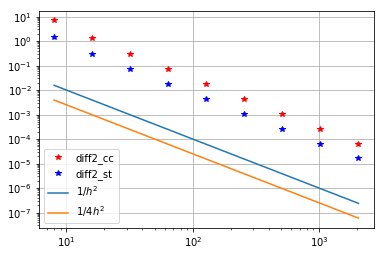

In [26]:
error_cc = []
error_st = []
for jj in grids:
    z =  np.linspace(x_s-2*L/(jj-1),x_e+2*L/(jj-1),jj+4)
    test  = np.exp(z**2)
    df2_real = (2+4*z**2)*np.exp(z**2)    
    df2_cc    = np.dot(diffmat2_cc(z,test),test[2:-2])     
    df2_st    = np.dot(diffmat2_st(z,test),test[2:-2])        
    error_cc.append(LA.norm(df2_real[2:-2]-df2_cc,np.inf))
    error_st.append(LA.norm(df2_real[2:-2]-df2_st,np.inf))

plt.figure()
plt.loglog(grids, error_cc, '*', label= 'diff2_cc',color='red')
plt.loglog(grids, error_st, '*', label= 'diff2_st',color ='blue')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.loglog(grids, .25*(grids)**(-2.), label='$1/4h^2$')
plt.legend(loc='lower left')
plt.grid()


From the figure above, we can approximatly conclude that both the methods have a second order accuracy. Besides, the "stagger point" method tends to have a better accuracy than the "double central difference" method by a factor of 4, which roughly coincides with the reference lines in the picture.

#### Accuracy on randomly non-uniform grids

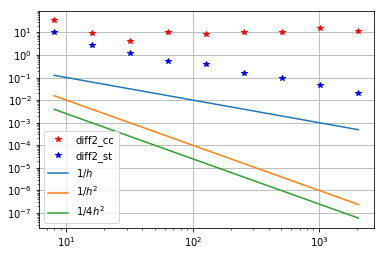

In [27]:
error_n_cc = []
error_n_st = []
for jj in grids:
    z =  np.linspace(x_s-2*L/(jj-1),x_e+2*L/(jj-1),jj+4)
    z_n =  np.asarray(list(map(lambda x: x+random()*L/(jj-1),z)))       #generate random grid points
    test  = np.exp(z_n**2)
    df2_real = (2+4*z_n**2)*np.exp(z_n**2)    
    df2_cc    = np.dot(diffmat2_cc(z_n,test),test[2:-2])     
    df2_st    = np.dot(diffmat2_st(z_n,test),test[2:-2])        
    error_n_cc.append(LA.norm(df2_real[2:-2]-df2_cc,np.inf))
    error_n_st.append(LA.norm(df2_real[2:-2]-df2_st,np.inf))

plt.figure()
plt.loglog(grids, error_n_cc, '*', label= 'diff2_cc',color='red')
plt.loglog(grids, error_n_st, '*', label= 'diff2_st',color ='blue')
plt.loglog(grids, grids**(-1.), label='$1/h$')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.loglog(grids, .25*(grids)**(-2.), label='$1/4h^2$')
plt.legend(loc='lower left')
plt.grid()


In this section, the way of generating the randomly distributed points is the same as the Part1 and by several experiments, the relationship between error and resolution with the inifinite norm is similar as the figure above. From the picture, we can summarize that both the method lose its second order accuracy and surprisingly, the "double central difference" scheme becomes unstable in most random cases, but the "stagger-point" method retains a first-order accuracy.

#### Accuracy on designed non-uniform grids

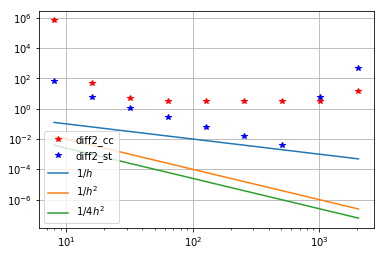

In [28]:
error_dn_cc = []
error_dn_st = []
for jj in grids:
    z =  np.linspace(x_s-2*L/(jj-1),x_e+2*L/(jj-1),jj+4)
    z_dn =  np.asarray(list(map(lambda x: x**3,z)))                      #generate cubic grid points
    test  = np.exp(z_dn**2)
    df2_real = (2+4*z_dn**2)*np.exp(z_dn**2)    
    df2_cc    = np.dot(diffmat2_cc(z_dn,test),test[2:-2])     
    df2_st    = np.dot(diffmat2_st(z_dn,test),test[2:-2])        
    error_dn_cc.append(LA.norm(df2_real[2:-2]-df2_cc,np.inf))
    error_dn_st.append(LA.norm(df2_real[2:-2]-df2_st,np.inf))

plt.figure()
plt.loglog(grids, error_dn_cc, '*', label= 'diff2_cc',color='red')
plt.loglog(grids, error_dn_st, '*', label= 'diff2_st',color ='blue')
plt.loglog(grids, grids**(-1.), label='$1/h$')
plt.loglog(grids, grids**(-2.), label='$1/h^2$')
plt.loglog(grids, .25*(grids)**(-2.), label='$1/4h^2$')
plt.legend(loc='lower left')
plt.grid()

In this section, with the same cubic grids as Part1, we can see for the test function in this problem, both the methods for computing the second derivative show instability. In detail, the "double central difference" method behaves as bad as the randomly distributed grids case and the "stagger-point" method presents the second-order accuracy in the first place but "blows up" in the end.